# Descriptive Analysis

#importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
demnd_df = pd.read_excel('Demand_Full Data_data_Raw_Data.xlsx', sheet_name = 'Cleaned', header=0, index_col=None)
demnd_df.head()

,Date,Hourly Profile,Season,Date (MST),Region,Load
0,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Calgary,1028.338458
1,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Central,1326.524094
2,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Edmonton,1375.897642
3,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Losses,279.050196
4,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Northeast,907.567566


In [3]:
demnd_df.describe()

,Load
count,552216.000000
mean,1001.390987
std,405.671653
min,-12.074965
25%,832.623760
50%,1007.087103
75%,1269.556363
max,2314.033850


In [4]:
demnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552216 entries, 0 to 552215
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            552216 non-null  object 
 1   Hourly Profile  552216 non-null  object 
 2   Season          552216 non-null  object 
 3   Date (MST)      552216 non-null  object 
 4   Region          552216 non-null  object 
 5   Load            552216 non-null  float64
dtypes: float64(1), object(5)
memory usage: 25.3+ MB


#Changing the datatypes of Date - date, Hourly profile - string, Season - string
# demnd_df['Date'] = demnd_df['Date'].astype('datetime64')
# demnd_df['Date']


# 1. Are there noticeable trends in energy consumption over the years?

In [ ]:
demnd_df.head(13)

In [ ]:
demnd_df.tail()

In [ ]:
demnd_df.iloc[12]

In [5]:
demnd_df['Date'] = pd.to_datetime(demnd_df['Date'], format='%d/%m/%Y')

In [6]:
demnd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552216 entries, 0 to 552215
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            552216 non-null  datetime64[ns]
 1   Hourly Profile  552216 non-null  object        
 2   Season          552216 non-null  object        
 3   Date (MST)      552216 non-null  object        
 4   Region          552216 non-null  object        
 5   Load            552216 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 25.3+ MB


In [7]:
demnd_df.set_index('Date', inplace=True)

In [8]:
df_numeric = demnd_df.apply(pd.to_numeric, errors='ignore')

In [9]:
df_numeric = df_numeric.select_dtypes(include=['float64', 'int64'])

In [10]:
# Resample the DataFrame by year and calculate mean
# Apply aggregation function
annual_energy_consumption = df_numeric.resample('M').mean()

In [11]:
annual_energy_consumption

,Load
Date,
2015-01-31,1076.161263
2015-02-28,1058.675519
2015-03-31,1002.164366
2015-04-30,960.815169
2015-05-31,926.038965
...,...
2023-08-31,983.469365
2023-09-30,949.916970
2023-10-31,972.525779


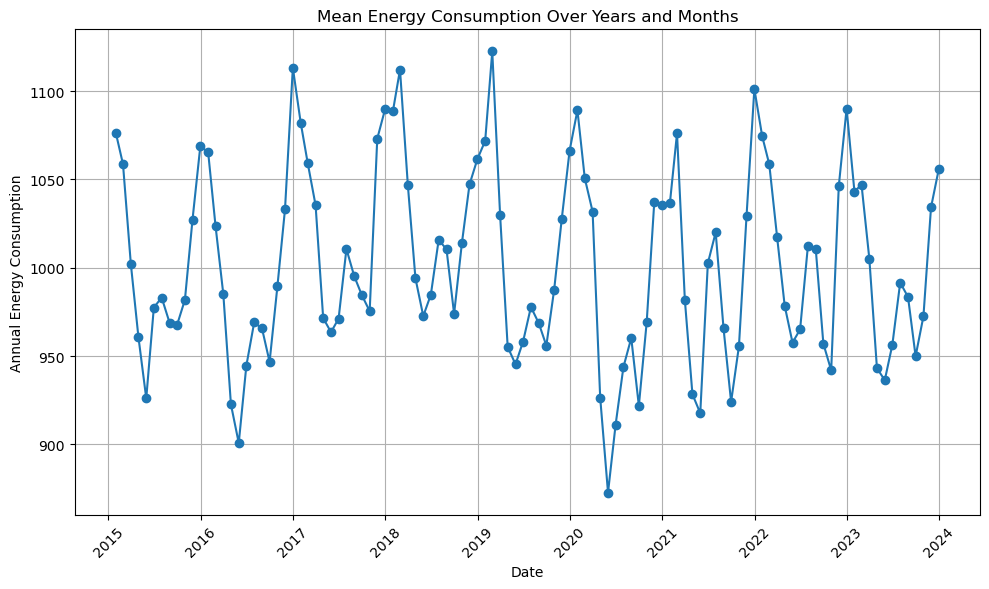

In [12]:
# Plot the mean energy consumption over the years and months
plt.figure(figsize=(10, 6))
plt.plot(annual_energy_consumption.index, annual_energy_consumption, marker='o')
plt.xlabel('Date')
plt.ylabel('Annual Energy Consumption')
plt.title('Mean Energy Consumption Over Years and Months')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [13]:
from scipy.stats import linregress

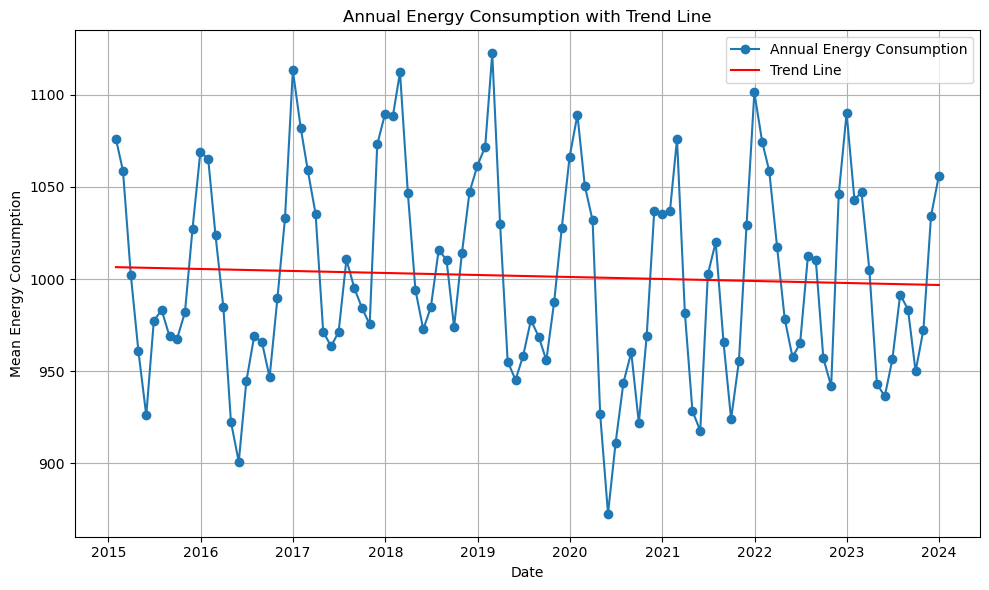

In [14]:
# Plot the annual energy consumption
plt.figure(figsize=(10, 6))
plt.plot(annual_energy_consumption.index, annual_energy_consumption['Load'], marker='o', label='Annual Energy Consumption')

# Fit a linear trend line
slope, intercept, _, _, _ = linregress(range(len(annual_energy_consumption.index)), annual_energy_consumption['Load'])
trend_line = slope * range(len(annual_energy_consumption.index)) + intercept
plt.plot(annual_energy_consumption.index, trend_line, color='red', label='Trend Line')

plt.xlabel('Date')
plt.ylabel('Mean Energy Consumption')
plt.title('Annual Energy Consumption with Trend Line')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\linta\AppData\Local\Temp\ipykernel_3096\3000112050.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


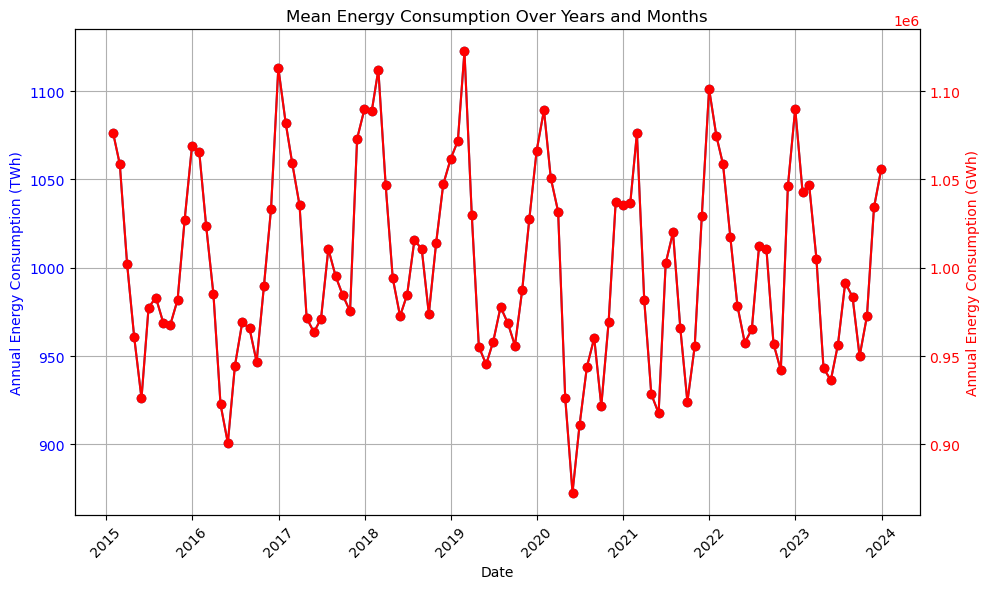

In [17]:
# Assuming 'annual_energy_consumption' is in TWh
annual_energy_consumption_gwh = annual_energy_consumption * 1000

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(annual_energy_consumption.index, annual_energy_consumption, marker='o', label='Energy Consumption (TWh)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Energy Consumption (TWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Rotate the x-axis labels by 45 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
ax2.plot(annual_energy_consumption.index, annual_energy_consumption_gwh, marker='o', label='Energy Consumption (GWh)', color='red')
ax2.set_ylabel('Annual Energy Consumption (GWh)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean Energy Consumption Over Years and Months')
plt.tight_layout()
plt.show()

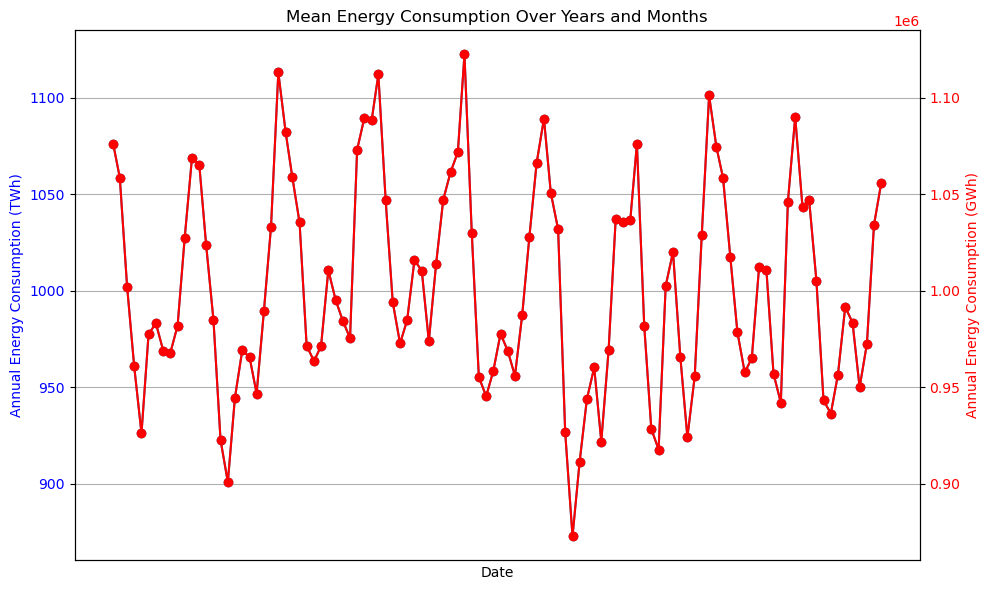

In [22]:
# Assuming annual_energy_consumption.index contains datetime objects with months specified
# If not, you may need to convert it to datetime format and extract the months

# Convert energy consumption from TWh to GWh
annual_energy_consumption_gwh = annual_energy_consumption * 1000

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(annual_energy_consumption.index, annual_energy_consumption, marker='o', label='Energy Consumption (TWh)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Annual Energy Consumption (TWh)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Set the x-axis tick labels to display month numbers
ax1.set_xticks(range(1, 13))  # Assuming months are represented by numbers from 1 to 12
ax1.set_xticklabels(range(1, 13))  # Set the tick labels to display month numbers

ax2 = ax1.twinx()
ax2.plot(annual_energy_consumption.index, annual_energy_consumption_gwh, marker='o', label='Energy Consumption (GWh)', color='red')
ax2.set_ylabel('Annual Energy Consumption (GWh)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean Energy Consumption Over Years and Months')
plt.tight_layout()
plt.show()



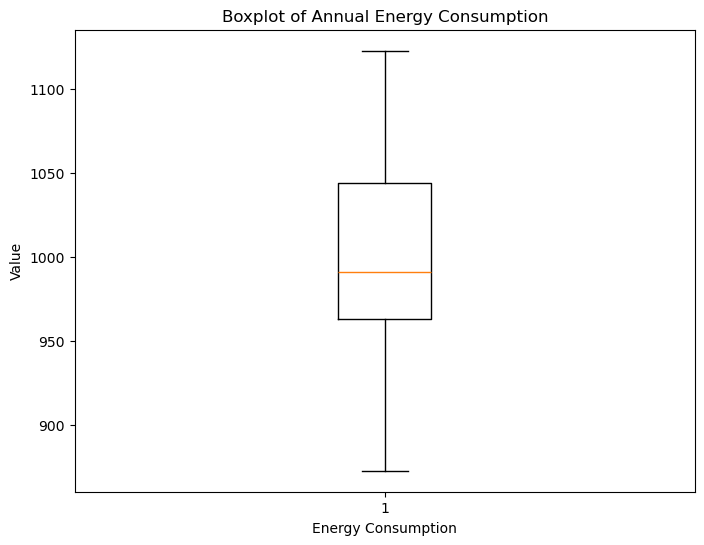

In [23]:
plt.figure(figsize=(8, 6))
plt.boxplot(annual_energy_consumption)

# Add labels and title
plt.xlabel('Energy Consumption')
plt.ylabel('Value')
plt.title('Boxplot of Annual Energy Consumption')

# Show the plot
plt.show()


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming annual_energy_consumption is a pandas DataFrame with 'Date' and 'Load' columns
annual_energy_consumption = pd.DataFrame({
    
})

# Convert 'Date' column to datetime
annual_energy_consumption['Date'] = pd.to_datetime(annual_energy_consumption['Date'])

# Calculate the range of load values for setting bins
load_min = annual_energy_consumption['Load'].min()
load_max = annual_energy_consumption['Load'].max()

# Create bins for load values
bins = [load_min + i * (load_max - load_min) / 20 for i in range(21)]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(annual_energy_consumption['Load'], bins=bins, alpha=0.5, label='Energy Consumption (TWh)')
plt.xlabel('Annual Energy Consumption (TWh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption Over Years and Months')

# Set x-axis ticks to represent months
plt.xticks(annual_energy_consumption['Load'], annual_energy_consumption['Date'].dt.strftime('%Y-%m'), rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


KeyError: "['Date'] not in index"